In [4]:
using Pkg
Pkg.activate("..")
using Revise
using PythonPlot,Statistics,Distributions,DataFrames,CSV
PythonPlot.svg(true)
using SizeStructuredPopulations
using SpecialFunctions
include("./examples.jl")

methods(generate_cell)

  Activating project at `~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations`


# 1 method for generic function "generate_cell" from SizeStructuredPopulations:
 [1] generate_cell(model::GrowthModel, init::Vector{Float64}, Tmax::Float64; dt)
     @ ~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations/src/model.jl:26

In [5]:
models = [M1(), M2(),M0()]
init = vcat([0.0], [0.0, 0.0], zeros(3))
T = 10.0
dt = 0.01
Tmax = T

function terminate(cell)
    return cell.time[end] > Tmax 
end

dfs = Vector{DataFrame}(undef, length(models))

for (i, m) in enumerate(models)
    model = GrowthModel(m...)

    cell = simulate_lineage(model,T, init, dt = 0.01);
    df = lineage_to_dataframe(cell);
    dfs[i] = df
end

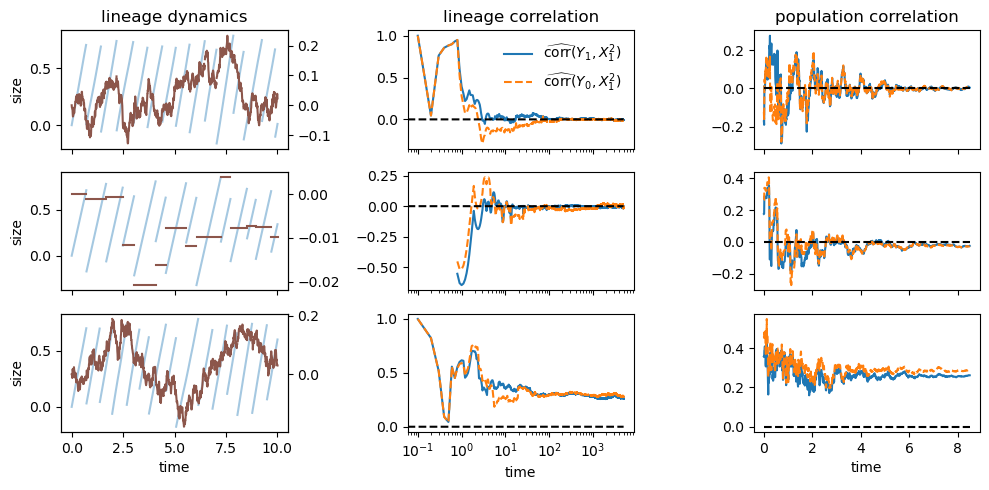

In [6]:
df_corrs = CSV.read("fig2_correlation_data.csv", DataFrame)

fig,axs = subplots(figsize=(10,5),ncols=3,nrows=3,sharex="col")

for i in 1:3
    ax = axs[i-1,0]
    axt = ax.twinx()
    df = dfs[i]
    #df = df[df.time .< 20.0,:]
    for p in unique(df.position)
        d = df[df.position .== p,:]
        ax.plot(d.time,d.z1,"C0-",alpha=0.4)
        axt.plot(d.time,d.x1,"C5-")
    end


    ax = axs[i-1,1]
    dfc = df_corrs[(df_corrs.model .==i) .& (df_corrs.ensemble .== "lineage"),:]
    ax.semilogx(dfc.time,dfc.z1_x12,label=L"\widehat{{\rm corr}}(Y_1,X_1^2)")
    ax.semilogx(dfc.time,dfc.z2_x12,"--",label=L"\widehat{{\rm corr}}(Y_0,X_1^2)")
    ax.plot(dfc.time,zeros(length(dfc.time)), "k--")


    ax = axs[i-1,2]
    dfc = df_corrs[(df_corrs.model .==i) .& (df_corrs.ensemble .== "population"),:]
    ax.plot(dfc.time,dfc.z1_x12)
    ax.plot(dfc.time,dfc.z2_x12,"--")
    ax.plot(dfc.time,zeros(length(dfc.time)), "k--")
end

axs[0,1].legend(loc="upper right",frameon=false)

axs[0,0].set_ylabel("size")
axs[1,0].set_ylabel("size")
axs[2,0].set_ylabel("size")
axs[0,0].set_title("lineage dynamics")
axs[0,1].set_title("lineage correlation")
axs[0,2].set_title("population correlation")

axs[2,0].set_xlabel("time")
axs[2,1].set_xlabel("time")
axs[2,2].set_xlabel("time")

tight_layout()
savefig("./fig2.pdf")
fig

In [7]:
df_corrs[df_corrs.ensemble .== "population",:]

Row,time,z1_x1,z1_x12,z2_x12,z0_x12,model,ensemble
,Float64,Float64,Float64,Float64,Float64,Float64,String15
1,0.0,0.0957484,-0.171787,-0.122306,-0.0981569,1.0,population
2,0.01,0.0866997,-0.189927,-0.160001,-0.0629102,1.0,population
3,0.02,0.0287308,-0.021315,0.00807962,-0.0513008,1.0,population
4,0.03,0.0274212,0.0142038,0.0473631,-0.0574092,1.0,population
5,0.04,0.0392702,-0.00682256,0.0278576,-0.0603283,1.0,population
6,0.05,0.0615824,0.0327717,0.068479,-0.0616723,1.0,population
7,0.06,0.0773041,0.0578056,0.091345,-0.0576572,1.0,population
8,0.07,0.078092,0.076791,0.103844,-0.0462106,1.0,population
9,0.08,0.0848313,0.0690498,0.0859709,-0.0287103,1.0,population


In [8]:
branches = make_branches(root, 0.1,5)
fig, ax = subplots(figsize=(10,4))
for (x0, y0, x1, y1) in branches
    ax.plot([x0, x1], [y0, y1], color="black",lw=0.5)
end
fig

UndefVarError: UndefVarError: `root` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing JuliaInterpreter in the current active module Main